In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
df = pd.read_csv(r"C:\Users\sunin\Downloads\archive (9)\train.csv")
#ques- to find the customer ID and name who places the most orders? to check customer loyalty

customer_order_frequency = df.groupby(['Customer ID', 'Customer Name', 'Segment']) ['Order ID'].count().reset_index() 
print(customer_order_frequency)


    Customer ID       Customer Name    Segment  Order ID
0      AA-10315          Alex Avila   Consumer        11
1      AA-10375        Allen Armold   Consumer        15
2      AA-10480        Andrew Allen   Consumer        12
3      AA-10645       Anna Andreadi   Consumer        18
4      AB-10015       Aaron Bergman   Consumer         6
..          ...                 ...        ...       ...
788    XP-21865        Xylona Preis   Consumer        28
789    YC-21895      Yoseph Carroll  Corporate         8
790    YS-21880       Yana Sorensen  Corporate        12
791    ZC-21910    Zuschuss Carroll   Consumer        31
792    ZD-21925  Zuschuss Donatelli   Consumer         9

[793 rows x 4 columns]


In [2]:
#rename column
customer_order_frequency = customer_order_frequency.rename(columns={'Order ID':'Total Orders'})
print(customer_order_frequency)

    Customer ID       Customer Name    Segment  Total Orders
0      AA-10315          Alex Avila   Consumer            11
1      AA-10375        Allen Armold   Consumer            15
2      AA-10480        Andrew Allen   Consumer            12
3      AA-10645       Anna Andreadi   Consumer            18
4      AB-10015       Aaron Bergman   Consumer             6
..          ...                 ...        ...           ...
788    XP-21865        Xylona Preis   Consumer            28
789    YC-21895      Yoseph Carroll  Corporate             8
790    YS-21880       Yana Sorensen  Corporate            12
791    ZC-21910    Zuschuss Carroll   Consumer            31
792    ZD-21925  Zuschuss Donatelli   Consumer             9

[793 rows x 4 columns]


In [4]:
#to calculate repeat customers
repeat_customers = customer_order_frequency[customer_order_frequency['Total Orders']>1]
print(repeat_customers)

    Customer ID       Customer Name    Segment  Total Orders
0      AA-10315          Alex Avila   Consumer            11
1      AA-10375        Allen Armold   Consumer            15
2      AA-10480        Andrew Allen   Consumer            12
3      AA-10645       Anna Andreadi   Consumer            18
4      AB-10015       Aaron Bergman   Consumer             6
..          ...                 ...        ...           ...
788    XP-21865        Xylona Preis   Consumer            28
789    YC-21895      Yoseph Carroll  Corporate             8
790    YS-21880       Yana Sorensen  Corporate            12
791    ZC-21910    Zuschuss Carroll   Consumer            31
792    ZD-21925  Zuschuss Donatelli   Consumer             9

[787 rows x 4 columns]


In [7]:
#sort repeat customer in ascending order
sorted_repeat_customers = repeat_customers.sort_values(by ='Total Orders',ascending = False)
print(sorted_repeat_customers)


    Customer ID      Customer Name      Segment  Total Orders
787    WB-21850      William Brown     Consumer            35
606    PP-18955         Paul Prost  Home Office            34
482    MA-17560       Matt Abelman  Home Office            34
387    JL-15835           John Lee     Consumer            33
720    SV-20365        Seth Vernon     Consumer            32
..          ...                ...          ...           ...
650    RM-19750      Roland Murray     Consumer             2
593    PH-18790  Patricia Hirasaki  Home Office             2
49     AR-10570     Anemone Ratner     Consumer             2
552    NB-18580     Nicole Brennan    Corporate             2
266    EL-13735          Ed Ludwig  Home Office             2

[787 rows x 4 columns]


In [11]:
print(sorted_repeat_customers.head(10).reset_index(drop = True))   #to print only first 10 values

  Customer ID        Customer Name      Segment  Total Orders
0    WB-21850        William Brown     Consumer            35
1    PP-18955           Paul Prost  Home Office            34
2    MA-17560         Matt Abelman  Home Office            34
3    JL-15835             John Lee     Consumer            33
4    SV-20365          Seth Vernon     Consumer            32
5    JD-15895     Jonathan Doherty    Corporate            32
6    CK-12205  Chloris Kastensmidt     Consumer            32
7    AP-10915       Arthur Prichep     Consumer            31
8    EP-13915           Emily Phan     Consumer            31
9    ZC-21910     Zuschuss Carroll     Consumer            31


In [19]:
#ques - Who is the best customer in terms of sales or ranking customers based on sales
#ans -We shall take 3 columns, use groupby clause-customer name,customer ID and sales
customer_sales =df.groupby(['Customer Name','Customer ID'])['Sales'].sum().reset_index()
print(customer_sales)

          Customer Name Customer ID     Sales
0         Aaron Bergman    AB-10015   886.156
1         Aaron Hawkins    AH-10030  1744.700
2        Aaron Smayling    AS-10045  3050.692
3       Adam Bellavance    AB-10060  7755.620
4             Adam Hart    AH-10075  3250.337
..                  ...         ...       ...
788        Xylona Preis    XP-21865  2374.658
789       Yana Sorensen    YS-21880  6720.444
790      Yoseph Carroll    YC-21895  5454.350
791    Zuschuss Carroll    ZC-21910  8025.707
792  Zuschuss Donatelli    ZD-21925  1493.944

[793 rows x 3 columns]


In [20]:
#to sort in descending order
top_spenders = customer_sales.sort_values(by = 'Sales',ascending = False)
print(top_spenders)



       Customer Name Customer ID      Sales
686      Sean Miller    SM-20320  25043.050
730     Tamara Chand    TC-20980  19052.218
622     Raymond Buch    RB-19360  15117.339
757     Tom Ashbrook    TA-21385  14595.620
6      Adrian Barton    AB-10105  14473.571
..               ...         ...        ...
545  Mitch Gastineau    MG-18205     16.739
123     Carl Jackson    CJ-11875     16.520
721       Sung Chung    SC-20845     14.112
455     Lela Donovan    LD-16855      5.304
737    Thais Sissman    TS-21085      4.833

[793 rows x 3 columns]


In [21]:
#to print only first 10 values and give me the new index starting from 0
print(top_spenders.head(10).reset_index(drop = True))

        Customer Name Customer ID      Sales
0         Sean Miller    SM-20320  25043.050
1        Tamara Chand    TC-20980  19052.218
2        Raymond Buch    RB-19360  15117.339
3        Tom Ashbrook    TA-21385  14595.620
4       Adrian Barton    AB-10105  14473.571
5        Ken Lonsdale    KL-16645  14175.229
6        Sanjit Chand    SC-20095  14142.334
7        Hunter Lopez    HL-15040  12873.298
8        Sanjit Engle    SE-20110  12209.438
9  Christopher Conant    CC-12370  12129.072


In [22]:
#Analysis of Shipping Methods
shipping_mode = df['Ship Mode'].unique()
print(shipping_mode)

['Second Class' 'Standard Class' 'First Class' 'Same Day']


In [24]:
#to calculate the frequency of shipping methods
shipping_frequency = df['Ship Mode'].value_counts().reset_index()
print(shipping_frequency)

        Ship Mode  count
0  Standard Class   5859
1    Second Class   1902
2     First Class   1501
3        Same Day    538


In [25]:
shipping_frequency = shipping_frequency.rename(columns={'Ship Mode':'Mode of Shipment', 'count':'Frequency'})
print(shipping_frequency)

  Mode of Shipment  Frequency
0   Standard Class       5859
1     Second Class       1902
2      First Class       1501
3         Same Day        538


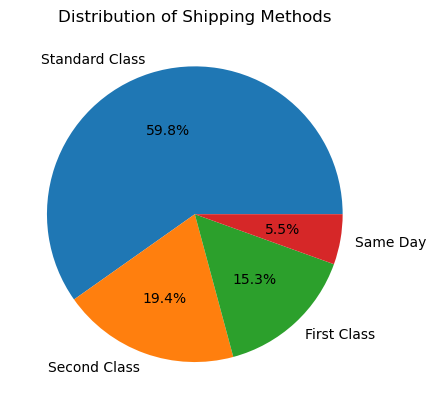

In [29]:
plt.pie(shipping_frequency['Frequency'], labels = shipping_frequency['Mode of Shipment'],autopct = '%1.1f%%')
plt.title("Distribution of Shipping Methods")
plt.show()

In [36]:
#Geographical Analysis
state = df['State'].unique()
print(state)


['Kentucky' 'California' 'Florida' 'North Carolina' 'Washington' 'Texas'
 'Wisconsin' 'Utah' 'Nebraska' 'Pennsylvania' 'Illinois' 'Minnesota'
 'Michigan' 'Delaware' 'Indiana' 'New York' 'Arizona' 'Virginia'
 'Tennessee' 'Alabama' 'South Carolina' 'Oregon' 'Colorado' 'Iowa' 'Ohio'
 'Missouri' 'Oklahoma' 'New Mexico' 'Louisiana' 'Connecticut' 'New Jersey'
 'Massachusetts' 'Georgia' 'Nevada' 'Rhode Island' 'Mississippi'
 'Arkansas' 'Montana' 'New Hampshire' 'Maryland' 'District of Columbia'
 'Kansas' 'Vermont' 'Maine' 'South Dakota' 'Idaho' 'North Dakota'
 'Wyoming' 'West Virginia']


AttributeError: 'Series' object has no attribute 'value_count'

In [38]:
state = df['State'].value_counts().reset_index()
print(state)

                   State  count
0             California   1946
1               New York   1097
2                  Texas    973
3           Pennsylvania    582
4             Washington    504
5               Illinois    483
6                   Ohio    454
7                Florida    373
8               Michigan    253
9         North Carolina    247
10              Virginia    224
11               Arizona    223
12             Tennessee    183
13              Colorado    179
14               Georgia    177
15              Kentucky    137
16               Indiana    135
17         Massachusetts    135
18                Oregon    122
19            New Jersey    122
20              Maryland    105
21             Wisconsin    105
22              Delaware     93
23             Minnesota     89
24           Connecticut     82
25              Missouri     66
26              Oklahoma     66
27               Alabama     61
28              Arkansas     60
29          Rhode Island     55
30      

In [39]:
state = state.rename(columns = {'count':'No. of customers'})
print(state)

                   State  No. of customers
0             California              1946
1               New York              1097
2                  Texas               973
3           Pennsylvania               582
4             Washington               504
5               Illinois               483
6                   Ohio               454
7                Florida               373
8               Michigan               253
9         North Carolina               247
10              Virginia               224
11               Arizona               223
12             Tennessee               183
13              Colorado               179
14               Georgia               177
15              Kentucky               137
16               Indiana               135
17         Massachusetts               135
18                Oregon               122
19            New Jersey               122
20              Maryland               105
21             Wisconsin               105
22         

In [41]:
#to cut down the list as it is too big
print(state.head(7))

          State  No. of customers
0    California              1946
1      New York              1097
2         Texas               973
3  Pennsylvania               582
4    Washington               504
5      Illinois               483
6          Ohio               454


              City  count
0    New York City    891
1      Los Angeles    728
2     Philadelphia    532
3    San Francisco    500
4          Seattle    426
..             ...    ...
524      San Mateo      1
525       Cheyenne      1
526         Conway      1
527      Melbourne      1
528     Springdale      1

[529 rows x 2 columns]


In [48]:
#customers by city
city = df['City'].unique()
print(city)
city = df['City'].value_counts().reset_index()
print(city )
city = city.rename(columns = {'count':'No. of customers'})
print(city)
print(city.head(7))

['Henderson' 'Los Angeles' 'Fort Lauderdale' 'Concord' 'Seattle'
 'Fort Worth' 'Madison' 'West Jordan' 'San Francisco' 'Fremont'
 'Philadelphia' 'Orem' 'Houston' 'Richardson' 'Naperville' 'Melbourne'
 'Eagan' 'Westland' 'Dover' 'New Albany' 'New York City' 'Troy' 'Chicago'
 'Gilbert' 'Springfield' 'Jackson' 'Memphis' 'Decatur' 'Durham' 'Columbia'
 'Rochester' 'Minneapolis' 'Portland' 'Saint Paul' 'Aurora' 'Charlotte'
 'Orland Park' 'Urbandale' 'Columbus' 'Bristol' 'Wilmington' 'Bloomington'
 'Phoenix' 'Roseville' 'Independence' 'Pasadena' 'Newark' 'Franklin'
 'Scottsdale' 'San Jose' 'Edmond' 'Carlsbad' 'San Antonio' 'Monroe'
 'Fairfield' 'Grand Prairie' 'Redlands' 'Hamilton' 'Westfield' 'Akron'
 'Denver' 'Dallas' 'Whittier' 'Saginaw' 'Medina' 'Dublin' 'Detroit'
 'Tampa' 'Santa Clara' 'Lakeville' 'San Diego' 'Brentwood' 'Chapel Hill'
 'Morristown' 'Cincinnati' 'Inglewood' 'Tamarac' 'Colorado Springs'
 'Belleville' 'Taylor' 'Lakewood' 'Arlington' 'Arvada' 'Hackensack'
 'Saint Petersburg'

In [80]:
#to find the sales by state, as we have to take 2 columns so use-groupby
state_sales = df.groupby(['State'])['Sales'].sum().reset_index()
print(state_sales)
#sort in descending order and print first 10
top_state_sales = state_sales.sort_values(by = 'Sales', ascending = False)
print(top_state_sales)

                   State        Sales
0                Alabama   19510.6400
1                Arizona   35272.6570
2               Arkansas   11678.1300
3             California  446306.4635
4               Colorado   31841.5980
5            Connecticut   13384.3570
6               Delaware   27322.9990
7   District of Columbia    2865.0200
8                Florida   88436.5320
9                Georgia   48219.1100
10                 Idaho    4382.4860
11              Illinois   79236.5170
12               Indiana   48718.4000
13                  Iowa    4443.5600
14                Kansas    2914.3100
15              Kentucky   36458.3900
16             Louisiana    9131.0500
17                 Maine    1270.5300
18              Maryland   23705.5230
19         Massachusetts   28634.4340
20              Michigan   76136.0740
21             Minnesota   29863.1500
22           Mississippi   10771.3400
23              Missouri   22205.1500
24               Montana    5589.3520
25          

In [57]:
print(top_state_sales.head(10).reset_index(drop = True))

          State        Sales
0    California  446306.4635
1      New York  306361.1470
2         Texas  168572.5322
3    Washington  135206.8500
4  Pennsylvania  116276.6500
5       Florida   88436.5320
6      Illinois   79236.5170
7      Michigan   76136.0740
8          Ohio   75130.3500
9      Virginia   70636.7200


In [58]:
#sales by city
city_sales = df.groupby(['City'])['Sales'].sum().reset_index()
print(city_sales)
#sort in descending order and print first 10
top_city_sales = city_sales.sort_values(by = 'Sales', ascending = False)
print(top_city_sales)

            City     Sales
0       Aberdeen    25.500
1        Abilene     1.392
2          Akron  2724.244
3    Albuquerque  2220.160
4     Alexandria  5519.570
..           ...       ...
524   Woonsocket   195.550
525      Yonkers  7657.666
526         York   817.978
527      Yucaipa    50.800
528         Yuma   840.865

[529 rows x 2 columns]
              City       Sales
327  New York City  252462.547
265    Los Angeles  173420.181
450        Seattle  116106.322
436  San Francisco  109041.120
372   Philadelphia  108841.749
..             ...         ...
352   Ormond Beach       2.808
368      Pensacola       2.214
221        Jupiter       2.064
140         Elyria       1.824
1          Abilene       1.392

[529 rows x 2 columns]


In [59]:
print(top_city_sales.head(10).reset_index(drop = True))

            City        Sales
0  New York City  252462.5470
1    Los Angeles  173420.1810
2        Seattle  116106.3220
3  San Francisco  109041.1200
4   Philadelphia  108841.7490
5        Houston   63956.1428
6        Chicago   47820.1330
7      San Diego   47521.0290
8   Jacksonville   44713.1830
9        Detroit   42446.9440


In [61]:
#product Analysis
#1. to analyse category and sub-category of products
product_category = df['Category'].unique()
print(product_category)

['Furniture' 'Office Supplies' 'Technology']


In [62]:
product_subcategory = df['Sub-Category'].unique()
print(product_subcategory)

['Bookcases' 'Chairs' 'Labels' 'Tables' 'Storage' 'Furnishings' 'Art'
 'Phones' 'Binders' 'Appliances' 'Paper' 'Accessories' 'Envelopes'
 'Fasteners' 'Supplies' 'Machines' 'Copiers']


In [63]:
product_subcategory = df['Sub-Category'].nunique()
print(product_subcategory)

17


In [66]:
#i want to groupby- category with subcategory tofind out how many sub_categories are there in each category?
subcategory_count =df.groupby(['Category'])['Sub-Category'].nunique().reset_index()
print(subcategory_count)


          Category  Sub-Category
0        Furniture             4
1  Office Supplies             9
2       Technology             4


In [68]:
#to sort in ascending order 
subcategory_count = subcategory_count.sort_values(by = 'Sub-Category', ascending = False)
print(subcategory_count)

          Category  Sub-Category
1  Office Supplies             9
0        Furniture             4
2       Technology             4


In [69]:
#As we can see in the output that index also changed but I want the index in sequence so I'll use reset_index(drop = True)
print(subcategory_count.reset_index(drop = True))

          Category  Sub-Category
0  Office Supplies             9
1        Furniture             4
2       Technology             4


In [71]:
#Sales per product category
product_sales = df.groupby(['Category'])['Sales'].sum().reset_index()
print(product_sales)
                        

          Category        Sales
0        Furniture  728658.5757
1  Office Supplies  705422.3340
2       Technology  827455.8730


In [72]:
#Which product category has the highest sales-sort in descending order
product_sales = product_sales.sort_values(by = 'Sales',ascending = False)
print(product_sales)

          Category        Sales
2       Technology  827455.8730
0        Furniture  728658.5757
1  Office Supplies  705422.3340


In [73]:
#to get index in sequence
print(product_sales.reset_index(drop = True))

          Category        Sales
0       Technology  827455.8730
1        Furniture  728658.5757
2  Office Supplies  705422.3340


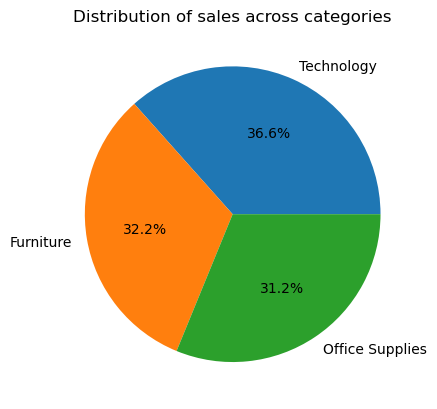

In [74]:
#plot a pie chart
plt.pie(product_sales['Sales'], labels = product_sales['Category'],autopct = '%1.1f%%')
plt.title("Distribution of sales across categories") #or top product category based on sales
plt.show()

In [75]:
#Sales per product subcategory
subcategory_sales = df.groupby(['Sub-Category'])['Sales'].sum().reset_index()
print(subcategory_sales)

   Sub-Category        Sales
0   Accessories  164186.7000
1    Appliances  104618.4030
2           Art   26705.4100
3       Binders  200028.7850
4     Bookcases  113813.1987
5        Chairs  322822.7310
6       Copiers  146248.0940
7     Envelopes   16128.0460
8     Fasteners    3001.9600
9   Furnishings   89212.0180
10       Labels   12347.7260
11     Machines  189238.6310
12        Paper   76828.3040
13       Phones  327782.4480
14      Storage  219343.3920
15     Supplies   46420.3080
16       Tables  202810.6280


In [76]:
subcategory_sales = subcategory_sales.sort_values(by = 'Sales', ascending = False)
print(subcategory_sales)

   Sub-Category        Sales
13       Phones  327782.4480
5        Chairs  322822.7310
14      Storage  219343.3920
16       Tables  202810.6280
3       Binders  200028.7850
11     Machines  189238.6310
0   Accessories  164186.7000
6       Copiers  146248.0940
4     Bookcases  113813.1987
1    Appliances  104618.4030
9   Furnishings   89212.0180
12        Paper   76828.3040
15     Supplies   46420.3080
2           Art   26705.4100
7     Envelopes   16128.0460
10       Labels   12347.7260
8     Fasteners    3001.9600


In [77]:
print(subcategory_sales.reset_index(drop = True))

   Sub-Category        Sales
0        Phones  327782.4480
1        Chairs  322822.7310
2       Storage  219343.3920
3        Tables  202810.6280
4       Binders  200028.7850
5      Machines  189238.6310
6   Accessories  164186.7000
7       Copiers  146248.0940
8     Bookcases  113813.1987
9    Appliances  104618.4030
10  Furnishings   89212.0180
11        Paper   76828.3040
12     Supplies   46420.3080
13          Art   26705.4100
14    Envelopes   16128.0460
15       Labels   12347.7260
16    Fasteners    3001.9600


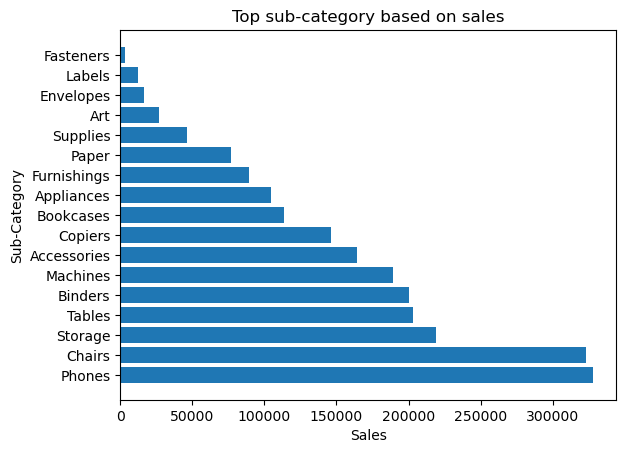

In [79]:
#Plot a horizontal bar graph
plt.barh(subcategory_sales['Sub-Category'],subcategory_sales['Sales'])
plt.xlabel('Sales')
plt.ylabel('Sub-Category')
plt.title("Top sub-category based on sales")
plt.show()

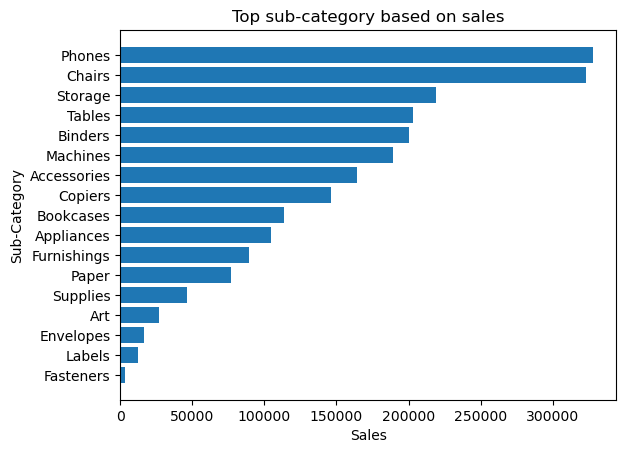

In [81]:
#to show the highest sale bar at the top and lowest sale bar at the bottom-change the sorting- ascending = True
subcategory_sales = subcategory_sales.sort_values(by = 'Sales', ascending = True)
plt.barh(subcategory_sales['Sub-Category'],subcategory_sales['Sales'])
plt.xlabel('Sales')
plt.ylabel('Sub-Category')
plt.title("Top sub-category based on sales")
plt.show()

In [85]:
#Sales Trend Analysis
#1. to convert order date into date time format
df['Order Date'] = pd.to_datetime(df['Order Date'],dayfirst = True)
print(df['Order Date'])

0      2017-11-08
1      2017-11-08
2      2017-06-12
3      2016-10-11
4      2016-10-11
          ...    
9795   2017-05-21
9796   2016-01-12
9797   2016-01-12
9798   2016-01-12
9799   2016-01-12
Name: Order Date, Length: 9800, dtype: datetime64[ns]


In [88]:
#grouping by year and summing the sales per year
df['Order Date'] = pd.to_datetime(df['Order Date'],dayfirst = True)
print(df['Order Date'])
yearly_sales = df.groupby(df['Order Date'].dt.year)['Sales'].sum()
print(yearly_sales)

0      2017-11-08
1      2017-11-08
2      2017-06-12
3      2016-10-11
4      2016-10-11
          ...    
9795   2017-05-21
9796   2016-01-12
9797   2016-01-12
9798   2016-01-12
9799   2016-01-12
Name: Order Date, Length: 9800, dtype: datetime64[ns]
Order Date
2015    479856.2081
2016    459436.0054
2017    600192.5500
2018    722052.0192
Name: Sales, dtype: float64


In [89]:
#to reset index and to rename the columns
yearly_sales = df.groupby(df['Order Date'].dt.year)['Sales'].sum().reset_index()
print(yearly_sales)


   Order Date        Sales
0        2015  479856.2081
1        2016  459436.0054
2        2017  600192.5500
3        2018  722052.0192


In [90]:
#rename the columns
yearly_sales = yearly_sales.rename(columns = {'Order Date':'Year','Sales':'Total Sales'})
print(yearly_sales)
                                

   Year  Total Sales
0  2015  479856.2081
1  2016  459436.0054
2  2017  600192.5500
3  2018  722052.0192


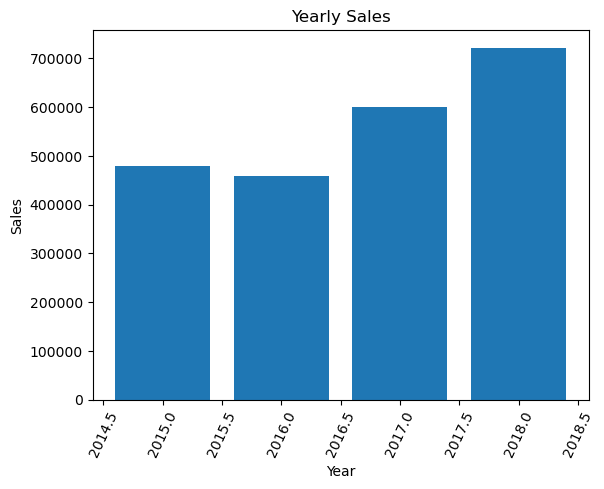

In [95]:
#to plot a bar graph
plt.bar(yearly_sales['Year'],yearly_sales['Total Sales'])
plt.xlabel('Year')
plt.ylabel('Sales')
plt.title("Yearly Sales")
plt.xticks(rotation = 65)
plt.show()

In [104]:
# Quartely Sales-1.First tell the python that date column is a day,month,year and convert it from string to datetime
df['Order Date'] = pd.to_datetime(df['Order Date'], dayfirst = True)
yearly_sales = df[df['Order Date'].dt.year == 2018]    #df[df['column name'] means  to filter rows based on a condition
print(yearly_sales)
#to print quarterly sales
quarterly_sales = yearly_sales.resample('Q',on ='Order Date')['Sales'].sum()
print(quarterly_sales)
                                        

      Row ID        Order ID Order Date   Ship Date       Ship Mode  \
12        13  CA-2018-114412 2018-04-15  20/04/2018  Standard Class   
23        24  US-2018-156909 2018-07-16  18/07/2018    Second Class   
34        35  CA-2018-107727 2018-10-19  23/10/2018    Second Class   
41        42  CA-2018-120999 2018-09-10  15/09/2018  Standard Class   
43        44  CA-2018-139619 2018-09-19  23/09/2018  Standard Class   
...      ...             ...        ...         ...             ...   
9768    9769  CA-2018-142328 2018-12-07  14/12/2018  Standard Class   
9787    9788  CA-2018-144491 2018-03-27  01/04/2018  Standard Class   
9788    9789  CA-2018-144491 2018-03-27  01/04/2018  Standard Class   
9789    9790  CA-2018-144491 2018-03-27  01/04/2018  Standard Class   
9790    9791  CA-2018-144491 2018-03-27  01/04/2018  Standard Class   

     Customer ID    Customer Name      Segment        Country           City  \
12      AA-10480     Andrew Allen     Consumer  United States      

C:\Users\sunin\AppData\Local\Temp\ipykernel_30964\788659384.py:6: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  quarterly_sales = yearly_sales.resample('Q',on ='Order Date')['Sales'].sum()


In [105]:
quarterly_sales = quarterly_sales.reset_index() 
quarterly_sales = quarterly_sales.rename(columns={'Order Date':'Quarter','Sales':'Total Sales'})
print(quarterly_sales) 

   index    Quarter  Total Sales
0      0 2018-03-31  122260.8842
1      1 2018-06-30  127558.6200
2      2 2018-09-30  193815.8400
3      3 2018-12-31  278416.6750


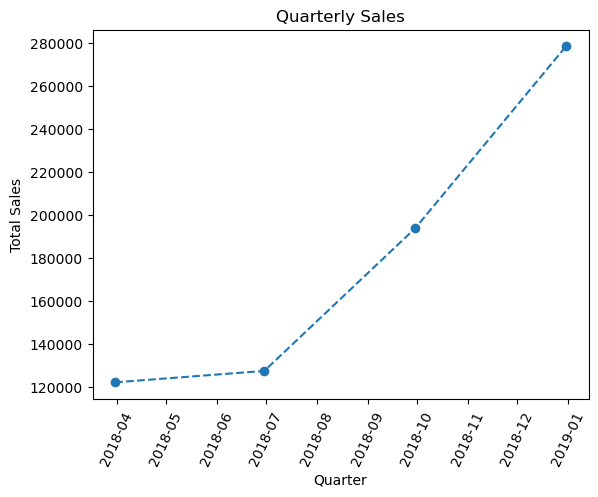

In [107]:
plt.plot(quarterly_sales['Quarter'],quarterly_sales['Total Sales'],marker = 'o',linestyle = "--")
plt.xlabel('Quarter')
plt.ylabel('Total Sales')
plt.title("Quarterly Sales")
plt.xticks(rotation = 65)
plt.show()


In [110]:
# to cslculate quarterly sales for the year 2019
df['Order Date'] = pd.to_datetime(df['Order Date'],dayfirst = True)
yearly_sales  = df[df['Order Date'].dt.year == 2016]
print(yearly_sales)

      Row ID        Order ID Order Date   Ship Date       Ship Mode  \
3          4  US-2016-108966 2016-10-11  18/10/2016  Standard Class   
4          5  US-2016-108966 2016-10-11  18/10/2016  Standard Class   
14        15  US-2016-118983 2016-11-22  26/11/2016  Standard Class   
15        16  US-2016-118983 2016-11-22  26/11/2016  Standard Class   
24        25  CA-2016-106320 2016-09-25  30/09/2016  Standard Class   
...      ...             ...        ...         ...             ...   
9785    9786  CA-2016-155635 2016-05-09  13/05/2016  Standard Class   
9796    9797  CA-2016-128608 2016-01-12  17/01/2016  Standard Class   
9797    9798  CA-2016-128608 2016-01-12  17/01/2016  Standard Class   
9798    9799  CA-2016-128608 2016-01-12  17/01/2016  Standard Class   
9799    9800  CA-2016-128608 2016-01-12  17/01/2016  Standard Class   

     Customer ID     Customer Name      Segment        Country  \
3       SO-20335    Sean O'Donnell     Consumer  United States   
4       SO-2033

In [112]:
# to get quarterly sales in year
quarterly_sales = yearly_sales.resample('Q', on = 'Order Date')['Sales'].sum()
print(quarterly_sales)

Order Date
2016-03-31     62357.6870
2016-06-30     87713.3730
2016-09-30    128560.2072
2016-12-31    180804.7382
Freq: QE-DEC, Name: Sales, dtype: float64


C:\Users\sunin\AppData\Local\Temp\ipykernel_30964\386408121.py:2: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  quarterly_sales = yearly_sales.resample('Q', on = 'Order Date')['Sales'].sum()


In [113]:
quarterly_sales = quarterly_sales.reset_index()
print(quarterly_sales)


  Order Date        Sales
0 2016-03-31   62357.6870
1 2016-06-30   87713.3730
2 2016-09-30  128560.2072
3 2016-12-31  180804.7382


In [114]:
quarterly_sales = quarterly_sales.rename(columns={'Order Date': 'Quarter','Sales':'Total Sales'})
print(quarterly_sales)

     Quarter  Total Sales
0 2016-03-31   62357.6870
1 2016-06-30   87713.3730
2 2016-09-30  128560.2072
3 2016-12-31  180804.7382


In [117]:
#to calculate the monthly sales
df['Order Date'] = pd.to_datetime(df['Order Date'],dayfirst = True)
yearly_sales = df[df['Order Date'].dt.year == 2018]
monthly_sales = yearly_sales.resample('M', on = 'Order Date')['Sales'].sum()
print(monthly_sales)

Order Date
2018-01-31     43476.4740
2018-02-28     19920.9974
2018-03-31     58863.4128
2018-04-30     35541.9101
2018-05-31     43825.9822
2018-06-30     48190.7277
2018-07-31     44825.1040
2018-08-31     62837.8480
2018-09-30     86152.8880
2018-10-31     77448.1312
2018-11-30    117938.1550
2018-12-31     83030.3888
Freq: ME, Name: Sales, dtype: float64


C:\Users\sunin\AppData\Local\Temp\ipykernel_30964\3629664924.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = yearly_sales.resample('M', on = 'Order Date')['Sales'].sum()


In [119]:
# to make it as an index
monthly_sales = monthly_sales.reset_index()
print(monthly_sales)

    index Order Date        Sales
0       0 2018-01-31   43476.4740
1       1 2018-02-28   19920.9974
2       2 2018-03-31   58863.4128
3       3 2018-04-30   35541.9101
4       4 2018-05-31   43825.9822
5       5 2018-06-30   48190.7277
6       6 2018-07-31   44825.1040
7       7 2018-08-31   62837.8480
8       8 2018-09-30   86152.8880
9       9 2018-10-31   77448.1312
10     10 2018-11-30  117938.1550
11     11 2018-12-31   83030.3888


In [120]:
monthly_sales = monthly_sales.rename(columns={'Order Date':'Month','Sales':'Total Sales'})
print(monthly_sales)

    index      Month  Total Sales
0       0 2018-01-31   43476.4740
1       1 2018-02-28   19920.9974
2       2 2018-03-31   58863.4128
3       3 2018-04-30   35541.9101
4       4 2018-05-31   43825.9822
5       5 2018-06-30   48190.7277
6       6 2018-07-31   44825.1040
7       7 2018-08-31   62837.8480
8       8 2018-09-30   86152.8880
9       9 2018-10-31   77448.1312
10     10 2018-11-30  117938.1550
11     11 2018-12-31   83030.3888


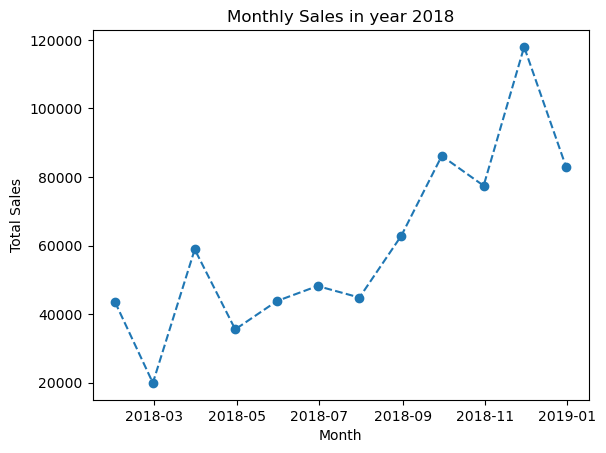

In [124]:
#plot a line graph
plt.plot(monthly_sales['Month'],monthly_sales['Total Sales'], marker = 'o', linestyle ='--')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.title("Monthly Sales in year 2018")
plt.show()


In [1]:
import os
print(os.getcwd())

C:\Users\sunin\Superstoreproject
